In [1]:
#import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [271]:
#import the data
path='/Users/user/Downloads/Bank_Personal_Loan_Modelling.csv'
df= pd.read_csv(path)

In [245]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


Exporative Data Analysis

In [35]:
df.shape

(5000, 14)

In [6]:
#checking data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().values.any()
#checking null values

False

In [7]:
#data summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
print(df.loc[df.Experience<0])
print(df.loc[df.Experience<0].count())

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          

There are actually 52 records reporting negative years of experience, which does not make sense. A person without experience should have 0 years of experience. Assuming this is what they meant, the negative values are changed to 0.

In [272]:
#replacing negative values
df['Experience'].loc[df.Experience<0]=0

/Users/user/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df.loc[df.Experience<0]
#negative values are now absent

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [11]:
df.describe()
#this had minimal effects on the mean and std, anyway

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.nunique()
#number of unique values

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
#number of people with zero mortgage
df.ID.loc[df.Mortgage==0].count()

3462

In [13]:
#number of people with zero CC spending per month
df.ID.loc[df.CCAvg==0].count()

106

In [14]:
df[['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard' ]].count()

Family                5000
Education             5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

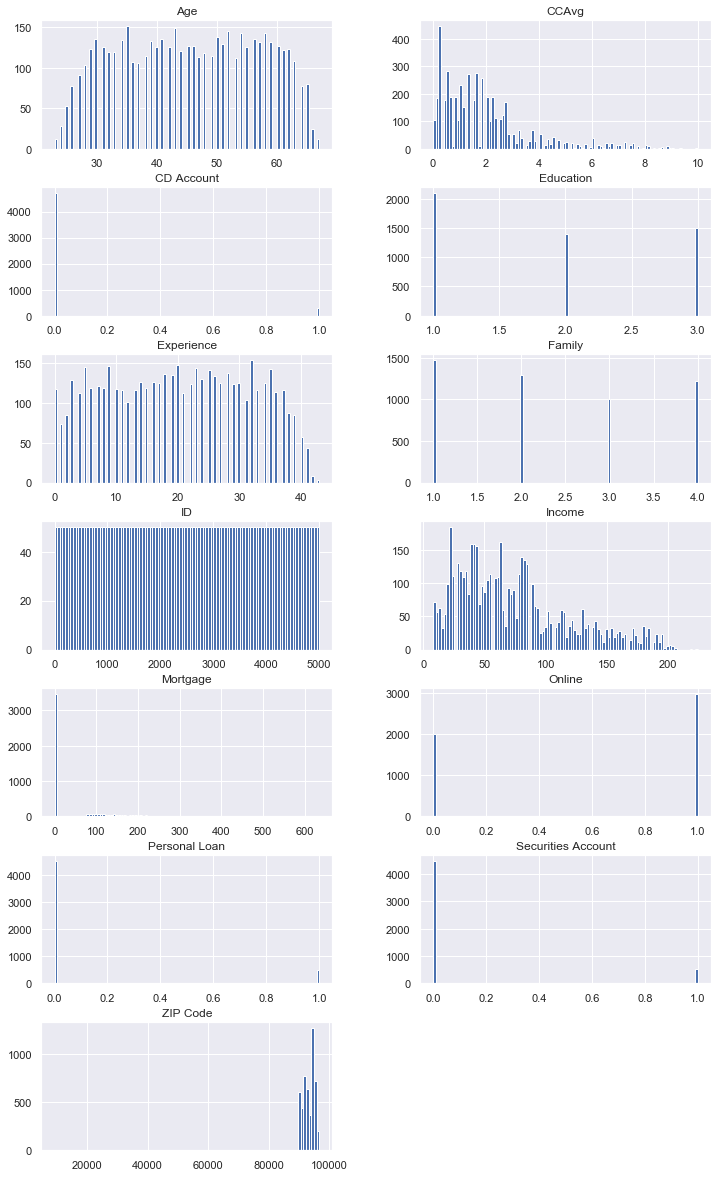

In [15]:
#univariate analysis of data
columns = list(df)[0:-1] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2)); 
# Histogram of first 8 columns

In [18]:
#bivariate analysis
cov= df.cov()
cov

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,2.083750e+06,-140.198640,-136.490098,-1175.826465,4.113995e+04,-27.827566,-62.250047,26.021304,-2043.804561,-10.547710,-7.492298,-2.376275,-1.790558,11.199840
Age,-1.401986e+02,131.404166,130.383204,-29.164822,-7.106319e+02,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,-1.364901e+02,130.383204,130.884673,-24.609716,-6.987153e+02,-0.685547,-0.997949,0.130058,-12.613579,-0.026487,-0.003887,0.027382,0.078438,0.046447
Income,-1.175826e+03,-29.164822,-24.609716,2119.104235,-1.602857e+03,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
ZIP Code,4.113995e+04,-710.631942,-698.715302,-1602.857394,4.502257e+06,28.681947,-15.058132,-30.966736,1593.492802,0.067125,3.052497,10.096438,17.685947,7.436005
Family,-2.782757e+01,-0.610664,-0.685547,-8.320957,2.868195e+01,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-6.225005e+01,-1.041997,-0.997949,51.970200,-1.505813e+01,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,2.602130e+01,0.397949,0.130058,-7.250120,-3.096674e+01,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-2.043805e+03,-14.619518,-12.613579,968.321693,1.593493e+03,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-1.054771e+01,-0.026092,-0.026487,6.814640,6.712543e-02,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376


In [19]:
#bivariate analysis
corr= df.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


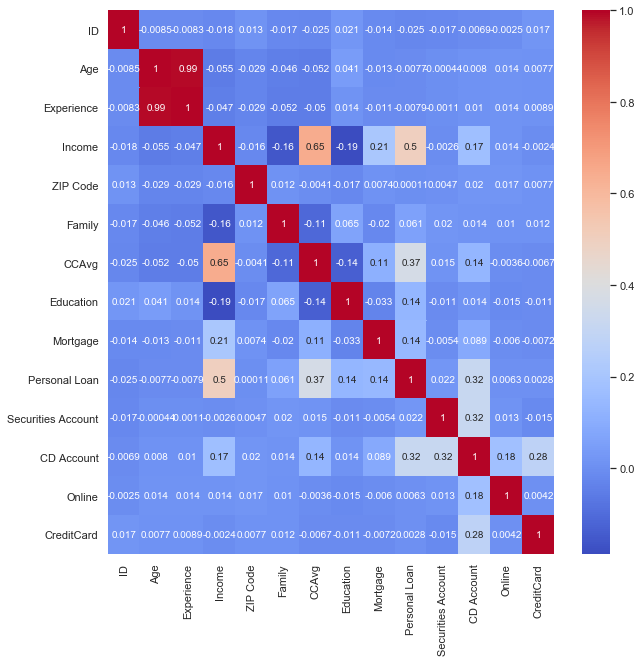

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Somewhat unsurprisingly there is a strong correlation between Income and CC average spending and also a correlation between Income and Personal loan (pearson r=0.5)

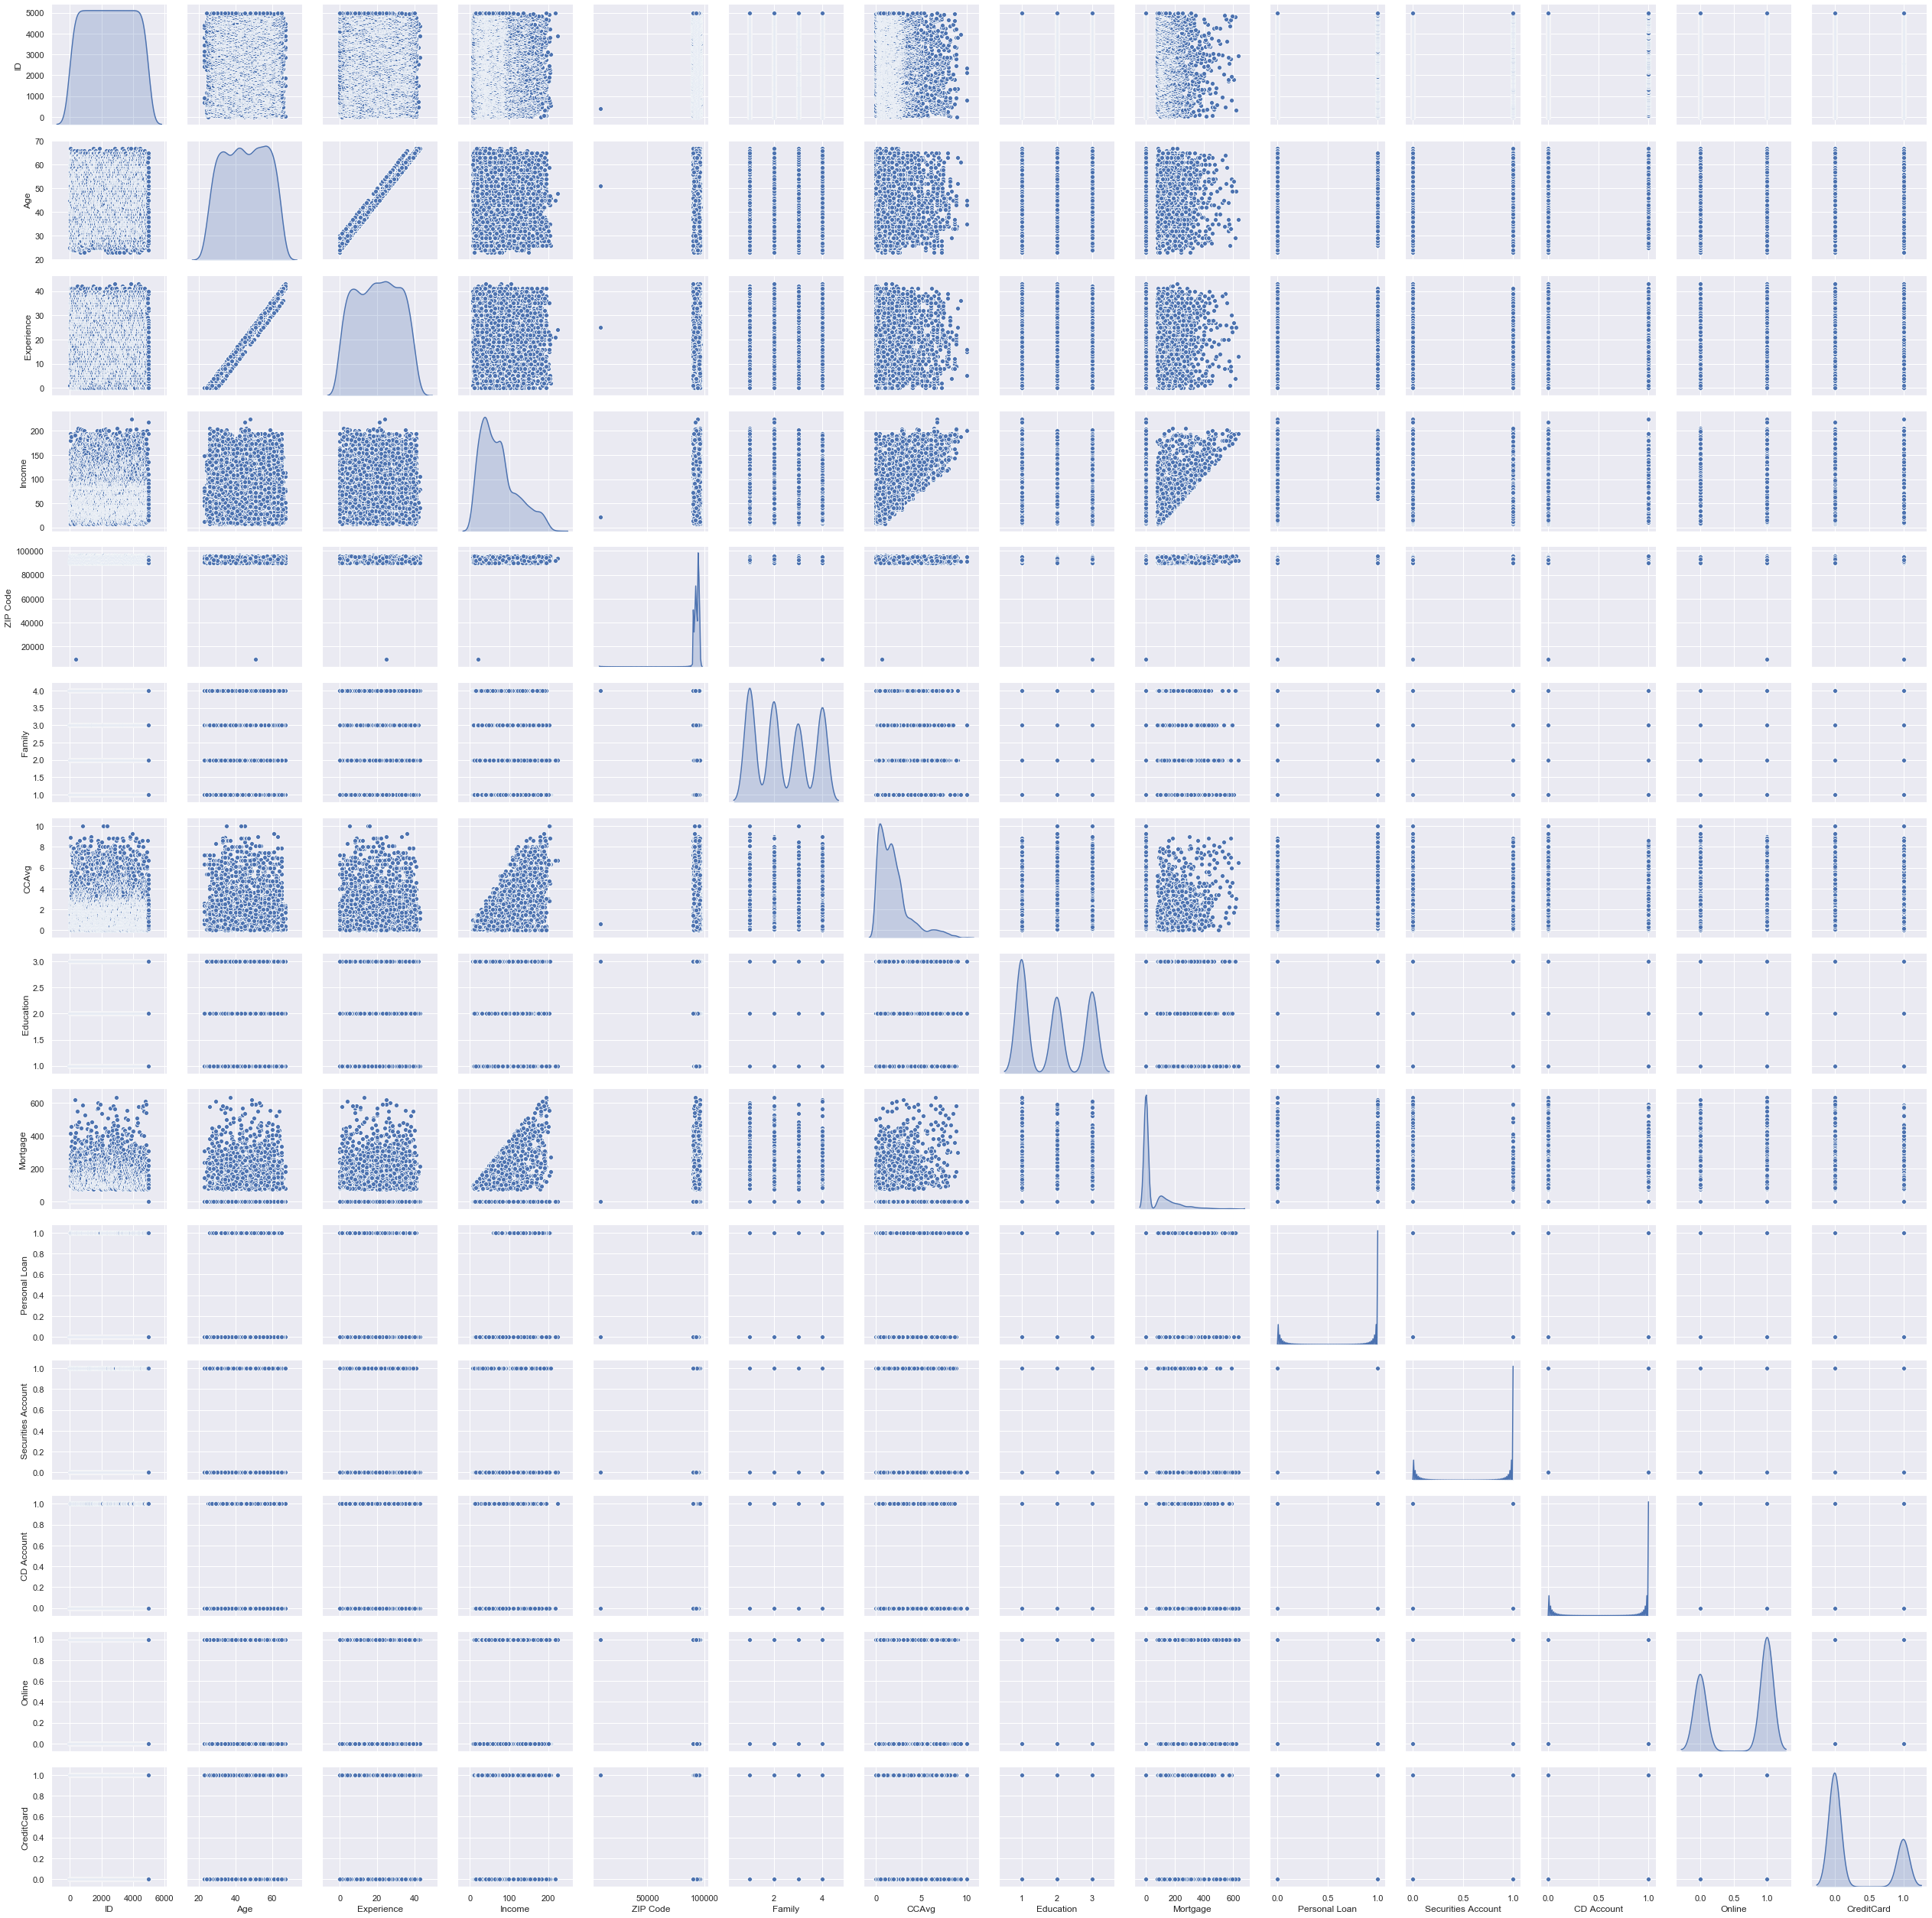

In [21]:
sns.pairplot(df,diag_kind='kde')

Data preparation

In [165]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [273]:
#experience has a high correlation with Age (r=0.99) and we can probably remove it
df=df.drop('Experience', axis=1)

In [274]:
df=df.drop('ZIP Code', axis=1)
#Let's assume ZIP code does not affect the outcome

In [249]:
df.head()

,ID,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,4,1.60,1,0,0,1,0,0,0
1,2,45,34,3,1.50,1,0,0,1,0,0,0
2,3,39,11,1,1.00,1,0,0,0,0,0,0
3,4,35,100,1,2.70,2,0,0,0,0,0,0
4,5,35,45,4,1.00,2,0,0,0,0,0,1


In [275]:
df= pd.get_dummies(data=df, columns= ['Education'])
#one hot encoding for categorical variables with multiple values

In [276]:
df=df.drop('ID', axis=1)

In [252]:
df.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,1.60,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,1.50,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,1.00,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,2.70,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,1.00,0,0,0,0,0,1,0,0,0,1,0,1,0


In [253]:
df.shape

(5000, 16)

In [159]:
from sklearn.preprocessing import MinMaxScaler
transf = MinMaxScaler()
#We scale the continuous values

In [277]:
df[['Age', 'Income','CCAvg', 'Mortgage', 'Family']] = transf.fit_transform(df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Family']])

In [278]:
df.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,0.05,0.19,1.00,0.16,0.00,0,1,0,0,0,1,0,0
1,0.50,0.12,0.67,0.15,0.00,0,1,0,0,0,1,0,0
2,0.36,0.01,0.00,0.10,0.00,0,0,0,0,0,1,0,0
3,0.27,0.43,0.00,0.27,0.00,0,0,0,0,0,0,1,0
4,0.27,0.17,1.00,0.10,0.00,0,0,0,0,1,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [279]:
X = df.drop('Personal Loan',axis=1)     
Y = df['Personal Loan']   
#two datasets are created, a variable to predict (Y) and the predicting features (X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


y_train.head(5)

1840    0
2115    0
4437    0
1146    0
2486    0
Name: Personal Loan, dtype: int64

In [11]:
print("{}% data was split to the training set".format((len(x_train)/len(df.index)) * 100))
print("{}% data was split to the test set".format((len(x_test)/len(df.index)) * 100))

70.0% data was split to the training set
30.0% data was split to the test set


In [280]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

     0    1    2    3    4     5    6     7     8     9    10    11  intercept
0 0.15 8.34 1.20 1.79 0.62 -0.73 2.99 -0.55 -0.92 -3.49 -0.81 -0.75      -5.05


In [281]:
model_score = model.score(x_test, y_test)
print(model_score)

0.954


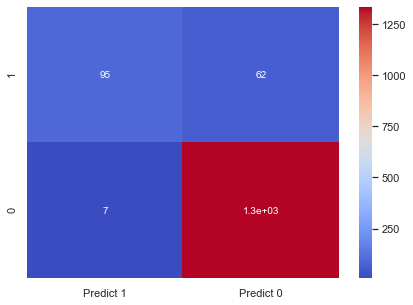

In [282]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, cmap='coolwarm', annot=True)

#This is the Confusion matrix, showing the correspondence between actual data and our predictions

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


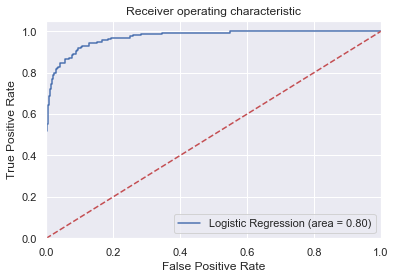

In [283]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#This shows the ROC Curve, with varying True and False positive rates with varying thresholds

In [14]:
import numpy as np

In [285]:
#the main metrics of the confusion matrix

from sklearn.metrics import accuracy_score
print('Accuracy : ',np.round( accuracy_score( y_test, y_predict ), 2 ) )
from sklearn.metrics import precision_score
print('Precision: ', precision_score(y_test, y_predict, average='macro'))
from sklearn.metrics import recall_score
print('Recall: ', recall_score(y_test, y_predict, average='macro'))
from sklearn.metrics import f1_score
print('F1 score: ', f1_score(y_test, y_predict, average='macro'))

#A summary of the performance of our model

Accuracy :  0.95
Precision:  0.9435117394597323
Recall:  0.7999416649672043
F1 score:  0.854208719586319


In [269]:
z = pd.DataFrame()                                               
z['Actual'] = y_test.values                                      
z['Probability that output is 0'] = model.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probability that output is 1'] = model.predict_proba(x_test)[:,1]

z['Predicted'] = model.predict(x_test)                               

z.head(5)

#This shows the probability of classification for each customer

,Actual,Probability that output is 0,Probability that output is 1,Predicted
0,0,1.00,0.00,0
1,1,0.82,0.18,0
2,0,0.97,0.03,0
3,0,1.00,0.00,0
4,0,0.99,0.01,0


In [270]:
z.loc[z['Predicted']!= z['Actual']].count()
#number of misclassified customers

Actual                          63
Probability that output is 0    63
Probability that output is 1    63
Predicted                       63
dtype: int64

In [286]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.119836
         Iterations 9


/Users/user/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [287]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 06 Nov 2020   Pseudo R-squ.:                  0.6107
Time:                        21:42:54   Log-Likelihood:                -419.43
converged:                       True   LL-Null:                       -1077.3
Covariance Type:            nonrobust   LLR p-value:                1.832e-275
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.9252   6.05e+06  -1.14e-06      1.000   -1.19e+07    1.19e+07
Age                    0.5713      0.352      1.624      0.104      -0.118       1.261
Income              

The model does not show an association between education level and loan, and age neither. Income, family, credit card average, securities account, CD account, credit card and the use of online facilities are associated.

In [288]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [289]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Income,12.29,216697.07,1.00,0.00
CD Account,3.77,43.36,0.98,0.00
Family,1.87,6.47,0.87,0.00
CCAvg,1.67,5.34,0.84,0.00
Online,-0.67,0.51,0.34,0.00
Securities Account,-0.92,0.40,0.29,0.01
CreditCard,-1.12,0.33,0.25,0.00


Business summary

The summary shows the strongest predictors of loan granting. Income appears the strongest predictor, with a high OR, followed by having a Certificate of Deposit account, family composition and the Credit card monthly balance. Age does not seem to impact the outcome, while some factors, such as having a credit card appear to be even negatively associated. 